In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
h = 0.25

In [3]:
fFD =  1./(2.*h*h) 
fPD =  1./(8.*h/2*h/2) 

In [4]:
M = np.zeros([23,23])

In [5]:
M [0][0] = 1

In [6]:
for i in range (1,4):
    M [i][i-1] = -2 * fFD
    M [i][i] = 4 * fFD
    M [i][i+1] = -2 * fFD

Match the displacement $u_3$ and $u_5$

In [7]:
M [5][5] = -1
M [5][3] = 1

Match the displacement $u_4$ and $u_7$

In [8]:
M [4][4] = -1
M [4][7] = 1

Interpolate the displacement $u_6$ and $u_6'$

* $u_6'-u_6=0$
* $\frac{1}{2}\left(u_3 + u_4\right)-u_5=0$

In [9]:
M [6][6] = -1
M [6][2] = -1/8
M [6][3] = 3/4
M [6][4] = 3/8

Apply the non-local model

In [10]:
for i in range(7,16):
    M[i][i-2] = -1.  * fPD
    M[i][i-1] = -4. * fPD
    M[i][i] = 10. * fPD
    M[i][i+1] =  -4. * fPD
    M[i][i+2] = -1. * fPD

Interpolate the displacement $u_{16}$ and $u_{16}'$

In [11]:
M [16][16] = -1
M [16][18] = 3/8
M [16][19] = 3/4
M [16][20] = -1/8

Match the displacement $u_{17}$ and $u_{19}$

In [12]:
M [17][17] = -1
M [17][19] = 1

Match the displacement $u_{15}$ and $u_{18}$

In [13]:
M [18][18] = -1
M [18][15] = 1

In [14]:
for i in range (19,22):
    M [i][i-1] = -2  * fFD
    M [i][i] = 4 * fFD
    M [i][i+1] = -2 * fFD

In [15]:
M [22][22] = 1

In [16]:
M

array([[  1.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ],
       [-16.   ,  32.   , -16.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ],
       [  0.   , -16.   ,  32.   , -16.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ],
       [  0.   ,   0.   , -16.   ,  32.   , -16.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0. 

In [17]:
x=np.arange(0,1,0.125)
x

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875])

In [18]:
x1 = np.arange(0,1.25,0.25)
x1

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [19]:
x2 = np.arange(1-2*0.125,2+3*0.125,0.125)
x2

array([0.75 , 0.875, 1.   , 1.125, 1.25 , 1.375, 1.5  , 1.625, 1.75 ,
       1.875, 2.   , 2.125, 2.25 ])

In [20]:
x3 = np.arange(2,3.25,0.25)
x3

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

In [21]:
x = np.array(np.concatenate((x1,x2,x3)))
x

array([0.   , 0.25 , 0.5  , 0.75 , 1.   , 0.75 , 0.875, 1.   , 1.125,
       1.25 , 1.375, 1.5  , 1.625, 1.75 , 1.875, 2.   , 2.125, 2.25 ,
       2.   , 2.25 , 2.5  , 2.75 , 3.   ])

Contruct the force vector

In [22]:
f = np.zeros([23])
f

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [23]:
for i in range(1,len(f)-1):
    f[i] =  -32/9 + 64/9 * x[i] - 64/27 * x[i] * x[i]

In [24]:
f [4] = 0 # the displacememnt is matching therefore the force is zero
f [5] = 0 
f [6] = 0 
f [18] = 0 
f [16] = 0
f [17] = 0

In [25]:
f

array([ 0.        , -1.92592593, -0.59259259,  0.44444444,  0.        ,
        0.        ,  0.        ,  1.18518519,  1.44444444,  1.62962963,
        1.74074074,  1.77777778,  1.74074074,  1.62962963,  1.44444444,
        1.18518519,  0.        ,  0.        ,  0.        ,  0.44444444,
       -0.59259259, -1.92592593,  0.        ])

In [26]:
u = np.linalg.solve(M,f)
u

array([-2.22044605e-16,  9.58015330e-02,  3.11973436e-01,  5.65182377e-01,
        7.90613539e-01,  5.65182377e-01,  6.81370180e-01,  7.90613539e-01,
        8.80076692e-01,  9.47017379e-01,  9.88317516e-01,  1.00227971e+00,
        9.88317516e-01,  9.47017379e-01,  8.80076692e-01,  7.90613539e-01,
        6.81370180e-01,  5.65182377e-01,  7.90613539e-01,  5.65182377e-01,
        3.11973436e-01,  9.58015330e-02,  0.00000000e+00])

In [27]:
x1 = np.arange(0,1,0.25)
x2 = np.arange(1,2,0.125)
x3 = np.arange(2,3.25,0.25)
x20 = np.array(np.concatenate((x1,x2,x3)))
x20

array([0.   , 0.25 , 0.5  , 0.75 , 1.   , 1.125, 1.25 , 1.375, 1.5  ,
       1.625, 1.75 , 1.875, 2.   , 2.25 , 2.5  , 2.75 , 3.   ])

In [28]:
uSlice = np.array(np.concatenate((u[0:5],u[8:15],u[18:len(u)])))
uSlice

array([-2.22044605e-16,  9.58015330e-02,  3.11973436e-01,  5.65182377e-01,
        7.90613539e-01,  8.80076692e-01,  9.47017379e-01,  9.88317516e-01,
        1.00227971e+00,  9.88317516e-01,  9.47017379e-01,  8.80076692e-01,
        7.90613539e-01,  5.65182377e-01,  3.11973436e-01,  9.58015330e-02,
        0.00000000e+00])

In [29]:
len(u)

23

In [30]:
len(uSlice)

17

In [31]:
len(x20)

17

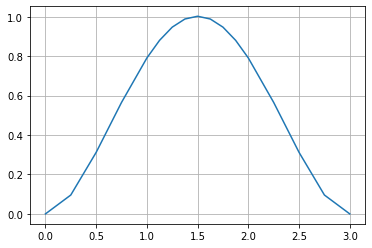

In [32]:
plt.plot(x20,uSlice)
plt.grid()

In [33]:
h2= 0.125

In [34]:
fFD2 =  1./(2.*h2*h2) 
fPD2 =  1./(8.*h2/2*h2/2) 

In [35]:
M2 = np.zeros([39,39])

In [36]:
M2 [0][0] = 1

In [37]:
for i in range (1, 8):
    M2[i][i-1]=-2 * fFD2
    M2[i][i]= 4 * fFD2
    M2[i][i+1]= -2 * fFD2

Match the dispacement between $u_7$ and $u_9$

In [38]:
M2[9][9]= -1
M2[9][7]=1

Match the dispacement between $u_8$ and $u_{11}$

In [39]:
M2[8][8]= -1
M2[8][11]=1

Interpolate the displacement $u_{10}$ and $u_{9}'$

* $u_{10}'-u_{10}=0$
* $\frac{1}{2}\left(u_7 + u_8\right)-u_{10}=0$

In [40]:
M2 [10][10] = -1
M2 [10][6] = -1/8
M2 [10][7] = 3/4
M2 [10][8] = 3/8

Apply the non-local model

In [41]:
for i in range(11,28):
    M2[i][i-2] = -1.  * fPD2
    M2[i][i-1] = -4. * fPD2
    M2[i][i] = 10. * fPD2
    M2[i][i+1] =  -4. * fPD2
    M2[i][i+2] = -1. * fPD2

Interpolate the displacement $u_{28}$ and $u_{28}'$

* $u_{28}'-u_{28}=0$
* $\frac{1}{2}\left(u_{30} + u_{31}\right)-u_{28}=0$

In [42]:
M2 [28][28] = -1
M2 [28][30] = 3/8
M2 [28][31] = 3/4
M2 [28][32] = -1/8

Match the displacement $u_{29}$ and $u_{31}$

In [43]:
M2 [29][29] = -1
M2 [29][31] = 1

Match the displacement $u_{27}$ and $u_{30}$

In [44]:
M2 [30][30] = -1
M2 [30][27] = 1

In [45]:
for i in range (31, 38):
    M2[i][i-1]=-2 * fFD2
    M2[i][i]= 4 * fFD2
    M2[i][i+1]= -2 * fFD2

In [46]:
M2 [38][38] = 1
M2

array([[  1.,   0.,   0., ...,   0.,   0.,   0.],
       [-64., 128., -64., ...,   0.,   0.,   0.],
       [  0., -64., 128., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 128., -64.,   0.],
       [  0.,   0.,   0., ..., -64., 128., -64.],
       [  0.,   0.,   0., ...,   0.,   0.,   1.]])

In [47]:
x1 = np.arange(0,1.125,0.125)
x2 = np.arange(1-2*0.0625,2+3*0.0625,0.0625)
x3 = np.arange(2,3.125,0.125)
x = np.array(np.concatenate((x1,x2,x3)))
x

array([0.    , 0.125 , 0.25  , 0.375 , 0.5   , 0.625 , 0.75  , 0.875 ,
       1.    , 0.875 , 0.9375, 1.    , 1.0625, 1.125 , 1.1875, 1.25  ,
       1.3125, 1.375 , 1.4375, 1.5   , 1.5625, 1.625 , 1.6875, 1.75  ,
       1.8125, 1.875 , 1.9375, 2.    , 2.0625, 2.125 , 2.    , 2.125 ,
       2.25  , 2.375 , 2.5   , 2.625 , 2.75  , 2.875 , 3.    ])

In [48]:
f2 = np.zeros([39])
f2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [49]:
for i in range(1,len(f2)-1):
    f2[i] =  -32/9 + 64/9 * x[i] - 64/27 * x[i] * x[i]

In [50]:
f2 [8] = 0 # the displacememnt is matching therefore the force is zero
f2 [9] = 0 
f2 [10] = 0 
f2 [30] = 0 
f2 [28] = 0
f2 [29] = 0
f2

array([ 0.        , -2.7037037 , -1.92592593, -1.22222222, -0.59259259,
       -0.03703704,  0.44444444,  0.85185185,  0.        ,  0.        ,
        0.        ,  1.18518519,  1.32407407,  1.44444444,  1.5462963 ,
        1.62962963,  1.69444444,  1.74074074,  1.76851852,  1.77777778,
        1.76851852,  1.74074074,  1.69444444,  1.62962963,  1.5462963 ,
        1.44444444,  1.32407407,  1.18518519,  0.        ,  0.        ,
        0.        ,  0.85185185,  0.44444444, -0.03703704, -0.59259259,
       -1.22222222, -1.92592593, -2.7037037 ,  0.        ])

In [51]:
u2 = np.linalg.solve(M2,f2)
u2

array([1.87350135e-16, 2.59652848e-02, 9.41759400e-02, 1.92479188e-01,
       3.09879658e-01, 4.36539387e-01, 5.63777820e-01, 6.84071808e-01,
       7.91055612e-01, 6.84071808e-01, 7.39227483e-01, 7.91055612e-01,
       8.38125610e-01, 8.80034898e-01, 9.16289266e-01, 9.46494975e-01,
       9.70325797e-01, 9.87528672e-01, 9.97922732e-01, 1.00139948e+00,
       9.97922732e-01, 9.87528672e-01, 9.70325797e-01, 9.46494975e-01,
       9.16289266e-01, 8.80034898e-01, 8.38125610e-01, 7.91055612e-01,
       7.39227483e-01, 6.84071808e-01, 7.91055612e-01, 6.84071808e-01,
       5.63777820e-01, 4.36539387e-01, 3.09879658e-01, 1.92479188e-01,
       9.41759400e-02, 2.59652848e-02, 0.00000000e+00])

In [52]:
x4 = np.arange(0,1,0.125)
x5 = np.arange(1,2,0.0625)
x6 = np.arange(2,3.125,0.125)
x7 = np.array(np.concatenate((x4,x5,x6)))
x7

array([0.    , 0.125 , 0.25  , 0.375 , 0.5   , 0.625 , 0.75  , 0.875 ,
       1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
       1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
       2.    , 2.125 , 2.25  , 2.375 , 2.5   , 2.625 , 2.75  , 2.875 ,
       3.    ])

In [53]:
uSlice2 = np.array(np.concatenate((u2[0:9],u2[12:27],u2[30:len(u2)])))
uSlice2

array([1.87350135e-16, 2.59652848e-02, 9.41759400e-02, 1.92479188e-01,
       3.09879658e-01, 4.36539387e-01, 5.63777820e-01, 6.84071808e-01,
       7.91055612e-01, 8.38125610e-01, 8.80034898e-01, 9.16289266e-01,
       9.46494975e-01, 9.70325797e-01, 9.87528672e-01, 9.97922732e-01,
       1.00139948e+00, 9.97922732e-01, 9.87528672e-01, 9.70325797e-01,
       9.46494975e-01, 9.16289266e-01, 8.80034898e-01, 8.38125610e-01,
       7.91055612e-01, 6.84071808e-01, 5.63777820e-01, 4.36539387e-01,
       3.09879658e-01, 1.92479188e-01, 9.41759400e-02, 2.59652848e-02,
       0.00000000e+00])

In [54]:
len(u2)

39

In [55]:
len(x7)

33

In [56]:
len(uSlice2)

33

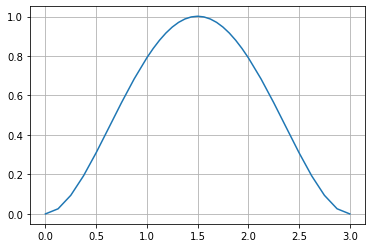

In [57]:
plt.plot(x7,uSlice2)
plt.grid()

In [58]:
h3=0.0625

In [59]:
fFD3 =  1./(2.*h3*h3) 
fPD3 =  1./(8.*h3/2*h3/2) 

In [60]:
M3 = np.zeros([71,71])

In [61]:
M3 [0][0] = 1

In [62]:
for i in range (1, 16):
    M3[i][i-1]=-2 * fFD3
    M3[i][i]= 4 * fFD3
    M3[i][i+1]= -2 * fFD3

Match the dispacement between $u_{15}$ and $u_{17}$

In [63]:
M3[17][17]= -1
M3[17][15]=1

Match the dispacement between $u_{16}$ and $u_{19}$

In [64]:
M3[16][16]= -1
M3[16][19]=1

Interpolate the displacement $u_{18}$ and $u_{18}'$

* $u_{18}'-u_{18}=0$
* $\frac{1}{2}\left(u_{15} + u_{16}\right)-u_{18}=0$

In [65]:
M3 [18][18] = -1
M3 [18][14]= -1/8
M3 [18][15] = 3/4
M3 [18][16] = 3/8

Apply the non-local model

In [66]:
for i in range(19,52):
    M3[i][i-2] = -1.  * fPD3
    M3[i][i-1] = -4. * fPD3
    M3[i][i] = 10. * fPD3
    M3[i][i+1] =  -4. * fPD3
    M3[i][i+2] = -1. * fPD3

Interpolate the displacement $u_{52}$ and $u_{52}'$

* $u_{52}'-u_{52}=0$
* $\frac{1}{2}\left(u_{54} + u_{55}\right)-u_{52}=0$

In [67]:
M3 [52][52] = -1
M3 [52][54] = 3/8
M3 [52][55] = 3/4
M3 [52][56] = -1/8

Match the displacement $u_{51}$ and $u_{54}$

In [68]:
M3 [54][54] = -1
M3 [54][51] = 1

Match the displacement $u_{53}$ and $u_{55}$

In [69]:
M3 [53][53] = -1
M3 [53][55] = 1

In [70]:
for i in range (55, 70):
    M3[i][i-1]=-2 * fFD3
    M3[i][i]= 4 * fFD3
    M3[i][i+1]= -2 * fFD3

In [71]:
M3 [70][70] = 1
M3

array([[   1.,    0.,    0., ...,    0.,    0.,    0.],
       [-256.,  512., -256., ...,    0.,    0.,    0.],
       [   0., -256.,  512., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,  512., -256.,    0.],
       [   0.,    0.,    0., ..., -256.,  512., -256.],
       [   0.,    0.,    0., ...,    0.,    0.,    1.]])

In [72]:
x1 = np.arange(0,1.0625,0.0625)
x2 = np.arange(1-2*0.03125,2+3*0.03125,0.03125)
x3 = np.arange(2,3.0625,0.0625)
x = np.array(np.concatenate((x1,x2,x3)))
x

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.4375 , 0.5    , 0.5625 , 0.625  , 0.6875 , 0.75   , 0.8125 ,
       0.875  , 0.9375 , 1.     , 0.9375 , 0.96875, 1.     , 1.03125,
       1.0625 , 1.09375, 1.125  , 1.15625, 1.1875 , 1.21875, 1.25   ,
       1.28125, 1.3125 , 1.34375, 1.375  , 1.40625, 1.4375 , 1.46875,
       1.5    , 1.53125, 1.5625 , 1.59375, 1.625  , 1.65625, 1.6875 ,
       1.71875, 1.75   , 1.78125, 1.8125 , 1.84375, 1.875  , 1.90625,
       1.9375 , 1.96875, 2.     , 2.03125, 2.0625 , 2.     , 2.0625 ,
       2.125  , 2.1875 , 2.25   , 2.3125 , 2.375  , 2.4375 , 2.5    ,
       2.5625 , 2.625  , 2.6875 , 2.75   , 2.8125 , 2.875  , 2.9375 ,
       3.     ])

In [73]:
f3 = np.zeros([71])
f3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [74]:
for i in range(1,len(f3)-1):
    f3[i] = -32/9 + 64/9 * x[i] - 64/27 * x[i] * x[i]

In [75]:
f3 [16] = 0 # the displacememnt is matching therefore the force is zero
f3 [17] = 0 
f3 [18] = 0 
f3 [52] = 0 
f3 [53] = 0
f3 [54] = 0
f3

array([ 0.        , -3.12037037, -2.7037037 , -2.30555556, -1.92592593,
       -1.56481481, -1.22222222, -0.89814815, -0.59259259, -0.30555556,
       -0.03703704,  0.21296296,  0.44444444,  0.65740741,  0.85185185,
        1.02777778,  0.        ,  0.        ,  0.        ,  1.18518519,
        1.25694444,  1.32407407,  1.38657407,  1.44444444,  1.49768519,
        1.5462963 ,  1.59027778,  1.62962963,  1.66435185,  1.69444444,
        1.71990741,  1.74074074,  1.75694444,  1.76851852,  1.77546296,
        1.77777778,  1.77546296,  1.76851852,  1.75694444,  1.74074074,
        1.71990741,  1.69444444,  1.66435185,  1.62962963,  1.59027778,
        1.5462963 ,  1.49768519,  1.44444444,  1.38657407,  1.32407407,
        1.25694444,  1.18518519,  0.        ,  0.        ,  0.        ,
        1.02777778,  0.85185185,  0.65740741,  0.44444444,  0.21296296,
       -0.03703704, -0.30555556, -0.59259259, -0.89814815, -1.22222222,
       -1.56481481, -1.92592593, -2.30555556, -2.7037037 , -3.12

In [76]:
u3 = np.linalg.solve(M3,f3)
u3

array([-8.50014503e-17,  6.72420809e-03,  2.56373629e-02,  5.51118604e-02,
        9.35924342e-02,  1.39596156e-01,  1.91712436e-01,  2.48603021e-01,
        3.09001998e-01,  3.71715790e-01,  4.35623157e-01,  4.99675201e-01,
        5.62895358e-01,  6.24379404e-01,  6.83295453e-01,  7.38883955e-01,
        7.90457700e-01,  7.38883955e-01,  7.65172672e-01,  7.90457700e-01,
        8.14571084e-01,  8.37458763e-01,  8.59052434e-01,  8.79291532e-01,
        8.98119463e-01,  9.15484248e-01,  9.31338412e-01,  9.45639006e-01,
        9.58347599e-01,  9.69430284e-01,  9.78857672e-01,  9.86604899e-01,
        9.92651618e-01,  9.96982005e-01,  9.99584759e-01,  1.00045310e+00,
        9.99584759e-01,  9.96982005e-01,  9.92651618e-01,  9.86604899e-01,
        9.78857672e-01,  9.69430284e-01,  9.58347599e-01,  9.45639006e-01,
        9.31338412e-01,  9.15484248e-01,  8.98119463e-01,  8.79291532e-01,
        8.59052434e-01,  8.37458763e-01,  8.14571084e-01,  7.90457700e-01,
        7.65172672e-01,  

In [77]:
x8 = np.arange(0,1,0.0625)
x9 = np.arange(1,2,0.03125)
x10 = np.arange(2,3.0625,0.0625)
x11 = np.array(np.concatenate((x8,x9,x10)))
x11

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.4375 , 0.5    , 0.5625 , 0.625  , 0.6875 , 0.75   , 0.8125 ,
       0.875  , 0.9375 , 1.     , 1.03125, 1.0625 , 1.09375, 1.125  ,
       1.15625, 1.1875 , 1.21875, 1.25   , 1.28125, 1.3125 , 1.34375,
       1.375  , 1.40625, 1.4375 , 1.46875, 1.5    , 1.53125, 1.5625 ,
       1.59375, 1.625  , 1.65625, 1.6875 , 1.71875, 1.75   , 1.78125,
       1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 , 1.96875, 2.     ,
       2.0625 , 2.125  , 2.1875 , 2.25   , 2.3125 , 2.375  , 2.4375 ,
       2.5    , 2.5625 , 2.625  , 2.6875 , 2.75   , 2.8125 , 2.875  ,
       2.9375 , 3.     ])

In [78]:
uSlice3 = np.array(np.concatenate((u3[0:17],u3[20:52],u3[55:len(u3)])))
uSlice3

array([-8.50014503e-17,  6.72420809e-03,  2.56373629e-02,  5.51118604e-02,
        9.35924342e-02,  1.39596156e-01,  1.91712436e-01,  2.48603021e-01,
        3.09001998e-01,  3.71715790e-01,  4.35623157e-01,  4.99675201e-01,
        5.62895358e-01,  6.24379404e-01,  6.83295453e-01,  7.38883955e-01,
        7.90457700e-01,  8.14571084e-01,  8.37458763e-01,  8.59052434e-01,
        8.79291532e-01,  8.98119463e-01,  9.15484248e-01,  9.31338412e-01,
        9.45639006e-01,  9.58347599e-01,  9.69430284e-01,  9.78857672e-01,
        9.86604899e-01,  9.92651618e-01,  9.96982005e-01,  9.99584759e-01,
        1.00045310e+00,  9.99584759e-01,  9.96982005e-01,  9.92651618e-01,
        9.86604899e-01,  9.78857672e-01,  9.69430284e-01,  9.58347599e-01,
        9.45639006e-01,  9.31338412e-01,  9.15484248e-01,  8.98119463e-01,
        8.79291532e-01,  8.59052434e-01,  8.37458763e-01,  8.14571084e-01,
        7.90457700e-01,  7.38883955e-01,  6.83295453e-01,  6.24379404e-01,
        5.62895358e-01,  

In [79]:
len(x11)

65

In [80]:
len(uSlice3)

65

In [81]:
len(u3)

71

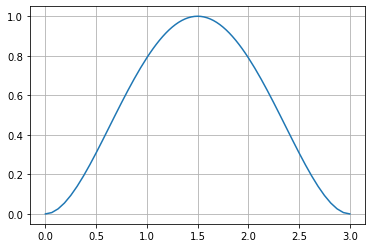

In [82]:
plt.grid()
plt.plot(x11,uSlice3)

In [83]:
def FDM (n,h):
    
    M4=np.zeros([n,n])

    M4[0][0] = 1

    for i in range(1,n-1):
        M4[i][i-1] = -2 
        M4[i][i] = 4 
        M4[i][i+1] = -2

    M4[n-1][n-1] = 1

    M4 *= 1./(2.*h*h)

    return M4

In [84]:
MFDM=FDM (49,0.0625)
len(MFDM)

49

In [85]:
fFDM=np.zeros([49])
len(fFDM)

49

In [86]:
x = np.arange(0,3.0625,0.0625)
x

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
       1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
       1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
       2.    , 2.0625, 2.125 , 2.1875, 2.25  , 2.3125, 2.375 , 2.4375,
       2.5   , 2.5625, 2.625 , 2.6875, 2.75  , 2.8125, 2.875 , 2.9375,
       3.    ])

In [87]:
for i in range(1,len(fFDM)-1):
    fFDM[i] = -32/9 + 64/9 * x[i] - 64/27 * x[i] * x[i]
fFDM

array([ 0.        , -3.12037037, -2.7037037 , -2.30555556, -1.92592593,
       -1.56481481, -1.22222222, -0.89814815, -0.59259259, -0.30555556,
       -0.03703704,  0.21296296,  0.44444444,  0.65740741,  0.85185185,
        1.02777778,  1.18518519,  1.32407407,  1.44444444,  1.5462963 ,
        1.62962963,  1.69444444,  1.74074074,  1.76851852,  1.77777778,
        1.76851852,  1.74074074,  1.69444444,  1.62962963,  1.5462963 ,
        1.44444444,  1.32407407,  1.18518519,  1.02777778,  0.85185185,
        0.65740741,  0.44444444,  0.21296296, -0.03703704, -0.30555556,
       -0.59259259, -0.89814815, -1.22222222, -1.56481481, -1.92592593,
       -2.30555556, -2.7037037 , -3.12037037,  0.        ])

In [88]:
uFDM = np.linalg.solve(MFDM,fFDM)
uFDM

array([-0.        ,  0.00679977,  0.02578848,  0.05533854,  0.09389468,
        0.13997396,  0.1921658 ,  0.24913194,  0.30960648,  0.37239583,
        0.43637876,  0.50050637,  0.56380208,  0.62536169,  0.6843533 ,
        0.74001736,  0.79166667,  0.83868634,  0.88053385,  0.916739  ,
        0.94690394,  0.97070312,  0.98788339,  0.99826389,  1.00173611,
        0.99826389,  0.98788339,  0.97070312,  0.94690394,  0.916739  ,
        0.88053385,  0.83868634,  0.79166667,  0.74001736,  0.6843533 ,
        0.62536169,  0.56380208,  0.50050637,  0.43637876,  0.37239583,
        0.30960648,  0.24913194,  0.1921658 ,  0.13997396,  0.09389468,
        0.05533854,  0.02578848,  0.00679977,  0.        ])

In [89]:
xFDM = np.arange(0,3.0625,0.0625)
xFDM
len (xFDM)

49

In [90]:
MFDM= FDM(4,1)
len(fFDM)

49

In [91]:
for i in range(1,len(fFDM)-1):
    fFDM[i] =  -32/9 + 64/9 * x[i] - 64/27 * x[i] * x[i]
fFDM

array([ 0.        , -3.12037037, -2.7037037 , -2.30555556, -1.92592593,
       -1.56481481, -1.22222222, -0.89814815, -0.59259259, -0.30555556,
       -0.03703704,  0.21296296,  0.44444444,  0.65740741,  0.85185185,
        1.02777778,  1.18518519,  1.32407407,  1.44444444,  1.5462963 ,
        1.62962963,  1.69444444,  1.74074074,  1.76851852,  1.77777778,
        1.76851852,  1.74074074,  1.69444444,  1.62962963,  1.5462963 ,
        1.44444444,  1.32407407,  1.18518519,  1.02777778,  0.85185185,
        0.65740741,  0.44444444,  0.21296296, -0.03703704, -0.30555556,
       -0.59259259, -0.89814815, -1.22222222, -1.56481481, -1.92592593,
       -2.30555556, -2.7037037 , -3.12037037,  0.        ])

Text(0.5, 1.0, 'Cubic solution ')

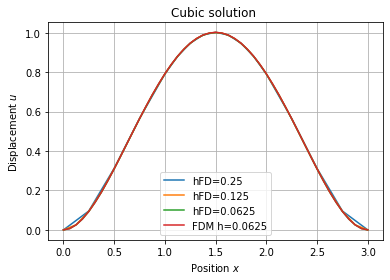

In [92]:
plt.grid()
plt.plot(x20,uSlice,label="hFD=0.25")
plt.plot(x7,uSlice2,label="hFD=0.125")
plt.plot(x11,uSlice3,label="hFD=0.0625")
plt.plot(xFDM,uFDM,label= "FDM h=0.0625")
plt.legend()
plt.xlabel(r"Position $x$")
plt.ylabel(r"Displacement $u$")
plt.title(r"Cubic solution ")

In [93]:
MFDM=FDM (49*2-1,0.0625/2)
len(MFDM)

97

In [94]:
fFDM=np.zeros([49*2-1])
len(fFDM)

97

In [95]:
len(uSlice3)

65

In [96]:
x = np.arange(0,3+0.0625/2,0.0625/2)
x

array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
       0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
       0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ,
       0.65625, 0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375,
       0.875  , 0.90625, 0.9375 , 0.96875, 1.     , 1.03125, 1.0625 ,
       1.09375, 1.125  , 1.15625, 1.1875 , 1.21875, 1.25   , 1.28125,
       1.3125 , 1.34375, 1.375  , 1.40625, 1.4375 , 1.46875, 1.5    ,
       1.53125, 1.5625 , 1.59375, 1.625  , 1.65625, 1.6875 , 1.71875,
       1.75   , 1.78125, 1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 ,
       1.96875, 2.     , 2.03125, 2.0625 , 2.09375, 2.125  , 2.15625,
       2.1875 , 2.21875, 2.25   , 2.28125, 2.3125 , 2.34375, 2.375  ,
       2.40625, 2.4375 , 2.46875, 2.5    , 2.53125, 2.5625 , 2.59375,
       2.625  , 2.65625, 2.6875 , 2.71875, 2.75   , 2.78125, 2.8125 ,
       2.84375, 2.875  , 2.90625, 2.9375 , 2.96875, 3.     ])

In [97]:
x[0:32:2]

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375])

In [98]:
x[len(x)-33:len(x):2]

array([2.    , 2.0625, 2.125 , 2.1875, 2.25  , 2.3125, 2.375 , 2.4375,
       2.5   , 2.5625, 2.625 , 2.6875, 2.75  , 2.8125, 2.875 , 2.9375,
       3.    ])

In [99]:
for i in range(1,len(fFDM)-1):
    fFDM[i] =  -32/9 + 64/9 * x[i] - 64/27 * x[i] * x[i]
fFDM

array([ 0.        , -3.33564815, -3.12037037, -2.90972222, -2.7037037 ,
       -2.50231481, -2.30555556, -2.11342593, -1.92592593, -1.74305556,
       -1.56481481, -1.3912037 , -1.22222222, -1.05787037, -0.89814815,
       -0.74305556, -0.59259259, -0.44675926, -0.30555556, -0.16898148,
       -0.03703704,  0.09027778,  0.21296296,  0.33101852,  0.44444444,
        0.55324074,  0.65740741,  0.75694444,  0.85185185,  0.94212963,
        1.02777778,  1.1087963 ,  1.18518519,  1.25694444,  1.32407407,
        1.38657407,  1.44444444,  1.49768519,  1.5462963 ,  1.59027778,
        1.62962963,  1.66435185,  1.69444444,  1.71990741,  1.74074074,
        1.75694444,  1.76851852,  1.77546296,  1.77777778,  1.77546296,
        1.76851852,  1.75694444,  1.74074074,  1.71990741,  1.69444444,
        1.66435185,  1.62962963,  1.59027778,  1.5462963 ,  1.49768519,
        1.44444444,  1.38657407,  1.32407407,  1.25694444,  1.18518519,
        1.1087963 ,  1.02777778,  0.94212963,  0.85185185,  0.75

In [100]:
uFDM4 = np.linalg.solve(MFDM,fFDM)
uFDM4

array([-0.        ,  0.00171803,  0.00669352,  0.01471625,  0.02558051,
        0.03908511,  0.05503337,  0.07323315,  0.09349682,  0.11564128,
        0.13948794,  0.16486274,  0.19159614,  0.21952311,  0.24848316,
        0.27832031,  0.3088831 ,  0.34002459,  0.37160238,  0.40347855,
        0.43551975,  0.46759711,  0.49958632,  0.53136755,  0.56282552,
        0.59384946,  0.62433313,  0.6541748 ,  0.68327727,  0.71154785,
        0.73889838,  0.76524523,  0.79050926,  0.81461589,  0.83749503,
        0.85908113,  0.87931315,  0.89813458,  0.91549344,  0.93134223,
        0.94563802,  0.95834238,  0.96942139,  0.97884567,  0.98659035,
        0.99263509,  0.99696407,  0.99956597,  1.00043403,  0.99956597,
        0.99696407,  0.99263509,  0.98659035,  0.97884567,  0.96942139,
        0.95834238,  0.94563802,  0.93134223,  0.91549344,  0.89813458,
        0.87931315,  0.85908113,  0.83749503,  0.81461589,  0.79050926,
        0.76524523,  0.73889838,  0.71154785,  0.68327727,  0.65

In [101]:
x[33:len(uFDM4)-34:1]

array([1.03125, 1.0625 , 1.09375, 1.125  , 1.15625, 1.1875 , 1.21875,
       1.25   , 1.28125, 1.3125 , 1.34375, 1.375  , 1.40625, 1.4375 ,
       1.46875, 1.5    , 1.53125, 1.5625 , 1.59375, 1.625  , 1.65625,
       1.6875 , 1.71875, 1.75   , 1.78125, 1.8125 , 1.84375, 1.875  ,
       1.90625, 1.9375 ])

In [102]:
xSlice = np.array(np.concatenate((x[0:31:2],x[32:len(uFDM4)-31:1],x[len(uFDM4)-32:len(uFDM4):2])))

In [103]:
len(xSlice)

66

In [104]:
xSlice

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.4375 , 0.5    , 0.5625 , 0.625  , 0.6875 , 0.75   , 0.8125 ,
       0.875  , 0.9375 , 1.     , 1.03125, 1.0625 , 1.09375, 1.125  ,
       1.15625, 1.1875 , 1.21875, 1.25   , 1.28125, 1.3125 , 1.34375,
       1.375  , 1.40625, 1.4375 , 1.46875, 1.5    , 1.53125, 1.5625 ,
       1.59375, 1.625  , 1.65625, 1.6875 , 1.71875, 1.75   , 1.78125,
       1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 , 1.96875, 2.     ,
       2.03125, 2.03125, 2.09375, 2.15625, 2.21875, 2.28125, 2.34375,
       2.40625, 2.46875, 2.53125, 2.59375, 2.65625, 2.71875, 2.78125,
       2.84375, 2.90625, 2.96875])

In [105]:
len(x11)

65

In [106]:
uFDM4Slice = np.array(np.concatenate((uFDM4[0:33:2],uFDM4[33:len(uFDM4)-33:1],uFDM4[len(uFDM4)-33:len(uFDM4):2])))


In [107]:
MFDM2=FDM(25*2-1,0.125/2)
len(MFDM2)

49

In [108]:
fFDM2=np.zeros([25*2-1])
len(fFDM2)

49

In [109]:
x2 = np.arange(0,3+0.125/2,0.125/2)
x2

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
       1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
       1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
       2.    , 2.0625, 2.125 , 2.1875, 2.25  , 2.3125, 2.375 , 2.4375,
       2.5   , 2.5625, 2.625 , 2.6875, 2.75  , 2.8125, 2.875 , 2.9375,
       3.    ])

In [110]:
for i in range(1,len(fFDM2)-1):
    fFDM2[i] = -32/9 + 64/9 * x[i] - 64/27 * x[i] * x[i]
fFDM2

array([ 0.        , -3.33564815, -3.12037037, -2.90972222, -2.7037037 ,
       -2.50231481, -2.30555556, -2.11342593, -1.92592593, -1.74305556,
       -1.56481481, -1.3912037 , -1.22222222, -1.05787037, -0.89814815,
       -0.74305556, -0.59259259, -0.44675926, -0.30555556, -0.16898148,
       -0.03703704,  0.09027778,  0.21296296,  0.33101852,  0.44444444,
        0.55324074,  0.65740741,  0.75694444,  0.85185185,  0.94212963,
        1.02777778,  1.1087963 ,  1.18518519,  1.25694444,  1.32407407,
        1.38657407,  1.44444444,  1.49768519,  1.5462963 ,  1.59027778,
        1.62962963,  1.66435185,  1.69444444,  1.71990741,  1.74074074,
        1.75694444,  1.76851852,  1.77546296,  0.        ])

In [111]:
uFDM5 = np.linalg.solve(MFDM2,fFDM2)
uFDM5

array([-0.        , -0.0764974 , -0.13996492, -0.19124349, -0.23115596,
       -0.26050709, -0.28008355, -0.29065394, -0.29296875, -0.28776042,
       -0.27574327, -0.25761357, -0.23404948, -0.20571108, -0.17324038,
       -0.13726128, -0.09837963, -0.05718316, -0.01424154,  0.02989366,
        0.07468895,  0.11962891,  0.16421622,  0.20797164,  0.25043403,
        0.2911603 ,  0.32972548,  0.36572266,  0.39876302,  0.42847584,
        0.45450846,  0.47652633,  0.49421296,  0.50726997,  0.51541703,
        0.51839193,  0.51595052,  0.50786675,  0.49393265,  0.47395833,
        0.44777199,  0.41521991,  0.37616645,  0.33049407,  0.2781033 ,
        0.21891276,  0.15285916,  0.07989728,  0.        ])

In [112]:
xSlice2 = np.array(np.concatenate((x[0:17:2],x[17:len(x)-17:1],x[len(x)-17:len(x):2])))
xSlice2

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.4375 , 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  , 0.65625,
       0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375, 0.875  ,
       0.90625, 0.9375 , 0.96875, 1.     , 1.03125, 1.0625 , 1.09375,
       1.125  , 1.15625, 1.1875 , 1.21875, 1.25   , 1.28125, 1.3125 ,
       1.34375, 1.375  , 1.40625, 1.4375 , 1.46875, 1.5    , 1.53125,
       1.5625 , 1.59375, 1.625  , 1.65625, 1.6875 , 1.71875, 1.75   ,
       1.78125, 1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 , 1.96875,
       2.     , 2.03125, 2.0625 , 2.09375, 2.125  , 2.15625, 2.1875 ,
       2.21875, 2.25   , 2.28125, 2.3125 , 2.34375, 2.375  , 2.40625,
       2.4375 , 2.46875, 2.5    , 2.5625 , 2.625  , 2.6875 , 2.75   ,
       2.8125 , 2.875  , 2.9375 , 3.     ])

In [113]:
uFDM5Slice = np.array(np.concatenate((uFDM5[0:17:2],uFDM5[17:len(uFDM5)-17:1],uFDM5[len(uFDM5)-17:len(uFDM5):2])))  
len(uFDM5Slice)


33

In [114]:
uSlice2-uFDM5Slice

array([ 1.87350135e-16,  1.65930201e-01,  3.25331901e-01,  4.72562738e-01,
        6.02848408e-01,  7.12282660e-01,  7.97827299e-01,  8.57312188e-01,
        8.89435241e-01,  8.95308770e-01,  8.94276435e-01,  8.86395603e-01,
        8.71806028e-01,  8.50696891e-01,  8.23312454e-01,  7.89951089e-01,
        7.50965448e-01,  7.06762432e-01,  6.57803194e-01,  6.04603141e-01,
        5.47731954e-01,  4.87813427e-01,  4.25526435e-01,  3.61599279e-01,
        2.96842649e-01,  1.68654780e-01,  4.78272991e-02, -5.73932663e-02,
       -1.37892333e-01, -1.83687262e-01, -1.83927359e-01, -1.26893873e-01,
        0.00000000e+00])

In [115]:
MFDM3=FDM(13*2-1,0.25/2)
len(MFDM3)

25

In [116]:
fFDM3=np.zeros([13*2-1])
len(fFDM3)

25

In [117]:
x3 = np.arange(0,3+0.25/2,0.25/2)
x3

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
       1.125, 1.25 , 1.375, 1.5  , 1.625, 1.75 , 1.875, 2.   , 2.125,
       2.25 , 2.375, 2.5  , 2.625, 2.75 , 2.875, 3.   ])

In [118]:
for i in range(1,len(fFDM3)-1):
    fFDM3[i] = -32/9 + 64/9 * x[i] - 64/27 * x[i] * x[i]

In [119]:
uFDM6 = np.linalg.solve(MFDM3,fFDM3)
uFDM6

array([-0.        , -0.34772859, -0.64333767, -0.89019097, -1.09157986,
       -1.25072338, -1.37076823, -1.45478877, -1.50578704, -1.52669271,
       -1.52036314, -1.48958333, -1.43706597, -1.36545139, -1.27730758,
       -1.17513021, -1.06134259, -0.93829572, -0.80826823, -0.67346644,
       -0.53602431, -0.39800347, -0.26139323, -0.12811053,  0.        ])

In [120]:
xSlice3 = np.array(np.concatenate((x[0:10:2],x[9:len(x)-9:1],x[len(x)-9:len(x):2])))
xSlice3

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.28125, 0.3125 ,
       0.34375, 0.375  , 0.40625, 0.4375 , 0.46875, 0.5    , 0.53125,
       0.5625 , 0.59375, 0.625  , 0.65625, 0.6875 , 0.71875, 0.75   ,
       0.78125, 0.8125 , 0.84375, 0.875  , 0.90625, 0.9375 , 0.96875,
       1.     , 1.03125, 1.0625 , 1.09375, 1.125  , 1.15625, 1.1875 ,
       1.21875, 1.25   , 1.28125, 1.3125 , 1.34375, 1.375  , 1.40625,
       1.4375 , 1.46875, 1.5    , 1.53125, 1.5625 , 1.59375, 1.625  ,
       1.65625, 1.6875 , 1.71875, 1.75   , 1.78125, 1.8125 , 1.84375,
       1.875  , 1.90625, 1.9375 , 1.96875, 2.     , 2.03125, 2.0625 ,
       2.09375, 2.125  , 2.15625, 2.1875 , 2.21875, 2.25   , 2.28125,
       2.3125 , 2.34375, 2.375  , 2.40625, 2.4375 , 2.46875, 2.5    ,
       2.53125, 2.5625 , 2.59375, 2.625  , 2.65625, 2.6875 , 2.71875,
       2.75   , 2.8125 , 2.875  , 2.9375 , 3.     ])

In [121]:
uFDM6Slice = np.array(np.concatenate((uFDM6[0:10:2],uFDM6[9:len(uFDM6)-9:1],uFDM6[len(uFDM6)-9:len(uFDM6):2])))  
len(uFDM6Slice)

17

In [122]:
uSlice-uFDM6Slice

array([-2.22044605e-16,  7.39139207e-01,  1.40355330e+00,  1.93595061e+00,
        2.29640058e+00,  2.40676940e+00,  2.46738052e+00,  2.47790085e+00,
        2.43934568e+00,  2.35376890e+00,  2.22432496e+00,  2.05520690e+00,
        1.85195613e+00,  1.37345061e+00,  8.47997742e-01,  3.57194762e-01,
        0.00000000e+00])

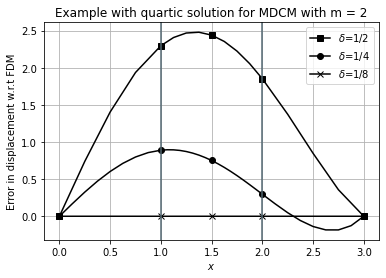

In [123]:
markers = ['s','o','x','.']
level = [4,8,16,64]

plt.plot(x20,uSlice-uFDM6Slice,color="black",marker=markers[0],markevery=level[0],label=r"$\delta$=1/2")
plt.plot(x7,uSlice2-uFDM5Slice,color="black",marker=markers[1],markevery=level[1],label=r"$\delta$=1/4")
plt.plot(x11,uSlice3-uFDM4Slice,color="black",marker=markers[2],markevery=level[2],label=r"$\delta$=1/8")
plt.legend()
plt.grid()
plt.title(r"Example with " + "quartic" + " solution for MDCM with m = 2")
plt.xlabel(r"$x$")
plt.ylabel(r"Error in displacement w.r.t FDM")
plt.axvline(x=1,c="#536872")
plt.axvline(x=2,c="#536872")
plt.savefig("coupling-mdcm-"+"quartic"+"-dirchelt-error.pdf",bbox_inches='tight')